In [14]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets
import datetime

In [15]:
people = pd.read_csv('people.csv')
tovary = pd.read_csv('tovary.csv')
category = pd.read_csv('category.csv')
check1 = pd.read_csv('check1.csv')

display(people)
display(tovary)
display(category)
display(check1)


,customer_id,last_name,registration_date
0,1,Іванов,2015-03-22
1,2,Петрова,2018-07-19
2,3,Сидоров,2020-11-01
3,0,Безіменний,2024-11-01


,product_id,product_name,category_id,price
0,101,Корм для котів,1,150
1,102,Лежанка для кота,2,350
2,103,Іграшка для собак,3,200
3,104,Повідок для собак,3,180
4,105,Корм для собак,1,130


,category_id,category_name
0,1,Корма
1,2,Ліжка та лежанки
2,3,Іграшки та аксесуари


,customer_id,product_id,quantity,purchase_date
0,1,105,2,2024-12-01
1,2,102,1,2024-12-05
2,1,105,3,2024-12-07
3,0,103,1,2024-12-09
4,2,104,2,2024-12-10
5,3,101,1,2024-12-12
6,1,103,2,2024-12-15


In [16]:
merged = pd.merge(category,tovary,on='category_id', how='inner')
data = pd.merge(check1,merged,on='product_id', how='inner')
data = pd.merge(data,people,on='customer_id', how='inner')

data

,customer_id,product_id,quantity,purchase_date,category_id,category_name,product_name,price,last_name,registration_date
0,1,105,2,2024-12-01,1,Корма,Корм для собак,130,Іванов,2015-03-22
1,2,102,1,2024-12-05,2,Ліжка та лежанки,Лежанка для кота,350,Петрова,2018-07-19
2,1,105,3,2024-12-07,1,Корма,Корм для собак,130,Іванов,2015-03-22
3,0,103,1,2024-12-09,3,Іграшки та аксесуари,Іграшка для собак,200,Безіменний,2024-11-01
4,2,104,2,2024-12-10,3,Іграшки та аксесуари,Повідок для собак,180,Петрова,2018-07-19
5,3,101,1,2024-12-12,1,Корма,Корм для котів,150,Сидоров,2020-11-01
6,1,103,2,2024-12-15,3,Іграшки та аксесуари,Іграшка для собак,200,Іванов,2015-03-22


In [17]:
date1 = pd.to_datetime(data['purchase_date'])
date2 = pd.to_datetime(data['registration_date'])

data['difference'] = (date1 - date2).dt.days // 365

p = 0.05 * data['difference']
display(p)

0    0.45
1    0.30
2    0.45
3    0.00
4    0.30
5    0.20
6    0.45
Name: difference, dtype: float64

In [18]:
data['total'] = data['quantity'] * data['price'] * (1-p)
display(data)

,customer_id,product_id,quantity,purchase_date,category_id,category_name,product_name,price,last_name,registration_date,difference,total
0,1,105,2,2024-12-01,1,Корма,Корм для собак,130,Іванов,2015-03-22,9,143.0
1,2,102,1,2024-12-05,2,Ліжка та лежанки,Лежанка для кота,350,Петрова,2018-07-19,6,245.0
2,1,105,3,2024-12-07,1,Корма,Корм для собак,130,Іванов,2015-03-22,9,214.5
3,0,103,1,2024-12-09,3,Іграшки та аксесуари,Іграшка для собак,200,Безіменний,2024-11-01,0,200.0
4,2,104,2,2024-12-10,3,Іграшки та аксесуари,Повідок для собак,180,Петрова,2018-07-19,6,252.0
5,3,101,1,2024-12-12,1,Корма,Корм для котів,150,Сидоров,2020-11-01,4,120.0
6,1,103,2,2024-12-15,3,Іграшки та аксесуари,Іграшка для собак,200,Іванов,2015-03-22,9,220.0


In [19]:
def summ_by_category():
    return data.groupby('category_name')['total'].sum().reset_index()

display(summ_by_category())


,category_name,total
0,Іграшки та аксесуари,672.0
1,Корма,477.5
2,Ліжка та лежанки,245.0


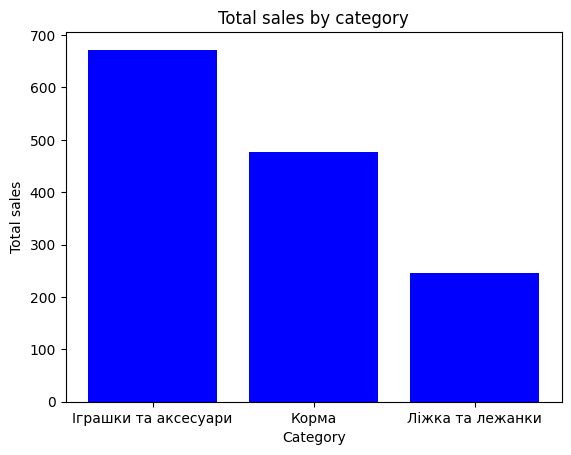

In [20]:
def bar_graph():
    result = summ_by_category()
    plt.bar(result['category_name'],result['total'], color='blue')
    plt.xlabel('Category')
    plt.ylabel('Total sales')
    plt.title('Total sales by category')
    plt.show()
bar_graph()

In [21]:
# Перетворення стовпця 'purchase_date' у формат datetime
data['purchase_date'] = pd.to_datetime(data['purchase_date'], errors='coerce')

# Функція для розрахунку витрат пацієнтів
def calculate_cost_patient(start, end):
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    
    # Фільтрація даних за датами
    filt = (data['purchase_date'] >= start) & (data['purchase_date'] <= end)
    filtered_df = data[filt]
    
    # Групування за прізвищем і підрахунок загальної суми
    filtered_df = filtered_df.groupby('last_name')['total'].sum().reset_index()
    
    # Відображення результату
    display(filtered_df)

# Віджети для вибору дат
start_date = widgets.DatePicker(
    description='Початкова дата:',
    value=data['purchase_date'].min()
)
end_date = widgets.DatePicker(
    description='Кінцева дата:',
    value=data['purchase_date'].max()
)

# Інтерактивний віджет
widget = widgets.interactive(calculate_cost_patient, start=start_date, end=end_date)
display(widget)

interactive(children=(DatePicker(value=Timestamp('2024-12-01 00:00:00'), description='Початкова дата:', step=1…

In [22]:
wd = widgets.Dropdown(
    options = data['last_name'].unique(),
    description='Прізвища',
    disabled=False
)
def show(value):
    if value in data['last_name'].values:
        filt = data[data['last_name'] == value]
        filt['max'] = filt['quantity']*filt['price'] - filt['total']
        result = filt.groupby('product_name')['max'].max()
        display(result)


widget = widgets.interactive(show, value=wd)
display(widget)

interactive(children=(Dropdown(description='Прізвища', options=('Іванов', 'Петрова', 'Безіменний', 'Сидоров'),…

In [23]:
# перевірка
data['max'] = data['quantity']*data['price'] - data['total']
result = data.groupby('product_name')['max'].max()
display(data)
display(result)


,customer_id,product_id,quantity,purchase_date,category_id,category_name,product_name,price,last_name,registration_date,difference,total,max
0,1,105,2,2024-12-01,1,Корма,Корм для собак,130,Іванов,2015-03-22,9,143.0,117.0
1,2,102,1,2024-12-05,2,Ліжка та лежанки,Лежанка для кота,350,Петрова,2018-07-19,6,245.0,105.0
2,1,105,3,2024-12-07,1,Корма,Корм для собак,130,Іванов,2015-03-22,9,214.5,175.5
3,0,103,1,2024-12-09,3,Іграшки та аксесуари,Іграшка для собак,200,Безіменний,2024-11-01,0,200.0,0.0
4,2,104,2,2024-12-10,3,Іграшки та аксесуари,Повідок для собак,180,Петрова,2018-07-19,6,252.0,108.0
5,3,101,1,2024-12-12,1,Корма,Корм для котів,150,Сидоров,2020-11-01,4,120.0,30.0
6,1,103,2,2024-12-15,3,Іграшки та аксесуари,Іграшка для собак,200,Іванов,2015-03-22,9,220.0,180.0


product_name
Іграшка для собак    180.0
Корм для котів        30.0
Корм для собак       175.5
Лежанка для кота     105.0
Повідок для собак    108.0
Name: max, dtype: float64

In [24]:
df = pd.read_csv('category.csv')

class Category:
    def __init__(self, id, name):
        self._id = id
        self._name = name

    @property
    def id(self):
        return self._id
    
    @id.setter
    def id(self,value):
        self._id = value
    @property
    def name(self):
        return self._name
    
    @name.setter
    def name(self, value):
        self._name = value

category = [Category(row['category_id'],row['category_name']) for _,row in df.iterrows()]

for c in category:
    print(f'ID: {c.id}, Name: {c.name}')



ID: 1, Name: Корма
ID: 2, Name: Ліжка та лежанки
ID: 3, Name: Іграшки та аксесуари


In [25]:
import unittest

class TestCategory(unittest.TestCase):
    def setUp(self):
        self.category = Category(1, 'Electronics')
    
    def test_get_id(self):
        self.assertEqual(self.category.id, 1)

    def test_set_id(self):
        self.category.id = 2
        self.assertEqual(self.category.id, 2)
    
    def test_get_name(self):
        self.assertEqual(self.category.name, 'Electronics')
    
    def test_set_name(self):
        self.category.name = 'Books'
        self.assertEqual(self.category.name, 'Books')

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.

...
----------------------------------------------------------------------
Ran 4 tests in 0.017s

OK
